# Analytics Vidya (JOB-A-THON)
---
>    ### Topic: Predict CLTV of a customer
 ## Author: Avinash Bagul
 ---
 ---

## Importing Required Libraries
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Given Traning Data
---

In [2]:
df = pd.read_excel("train.xlsx")
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


<AxesSubplot: >

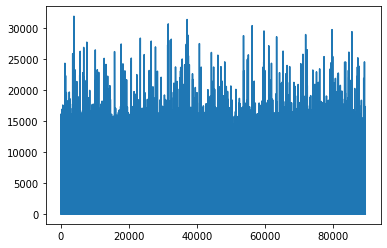

In [3]:
df.claim_amount.plot()

In [44]:
df.claim_amount.describe()

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

## Checking for Null Values
---

In [45]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

## Looking at nunique feature values in the dataset
---

In [6]:
df.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

## Dropping irrelevant columns and the cltv
---

In [8]:
X = df.drop(['id', 'cltv'], axis=1)
X.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


## y (cltv)
---

In [9]:
y = df[['cltv']]
y.head()

,cltv
0,64308
1,515400
2,64212
3,97920
4,59736


## Feature Engineering: OneHotEncoding using pandas get_dummies
---

In [10]:
X_encoded = pd.get_dummies(X, columns = ['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'num_policies', 'policy', 'type_of_policy'])  ## Pandas function to create dummy variables similar to OneHotEncoder

In [11]:
X_encoded.head(1)

,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,...,vintage_7,vintage_8,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,5790,0,1,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0


In [12]:
X_encoded.columns

Index(['claim_amount', 'gender_Female', 'gender_Male', 'area_Rural',
       'area_Urban', 'qualification_Bachelor', 'qualification_High School',
       'qualification_Others', 'income_2L-5L', 'income_5L-10L', 'income_<=2L',
       'income_More than 10L', 'marital_status_0', 'marital_status_1',
       'vintage_0', 'vintage_1', 'vintage_2', 'vintage_3', 'vintage_4',
       'vintage_5', 'vintage_6', 'vintage_7', 'vintage_8', 'num_policies_1',
       'num_policies_More than 1', 'policy_A', 'policy_B', 'policy_C',
       'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver'],
      dtype='object')

## Renaming the columns to meet the norms
---

In [13]:
X_encoded.rename(columns = {'income_2L-5L':'income_1', 'income_5L-10L':'income_2',
                              'income_<=2L':'income_3', 'income_More than 10L':'income_4'}, inplace = True)  ## Renaming the columns

In [14]:
X_encoded.columns

Index(['claim_amount', 'gender_Female', 'gender_Male', 'area_Rural',
       'area_Urban', 'qualification_Bachelor', 'qualification_High School',
       'qualification_Others', 'income_1', 'income_2', 'income_3', 'income_4',
       'marital_status_0', 'marital_status_1', 'vintage_0', 'vintage_1',
       'vintage_2', 'vintage_3', 'vintage_4', 'vintage_5', 'vintage_6',
       'vintage_7', 'vintage_8', 'num_policies_1', 'num_policies_More than 1',
       'policy_A', 'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver'],
      dtype='object')

## Using MinMaxScaler to scale down the data (claim amount)
---

In [15]:
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler

norm = MinMaxScaler()

X_norm = norm.fit_transform(X_encoded)
X_norm

array([[0.18153885, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15927761, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08148868, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.10544303, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

## Splitting the data to evaluate the model locally
---

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=123)

In [17]:
X_train[1]

array([0.0918041, 0.       , 1.       , 0.       , 1.       , 1.       ,
       0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 1.       , 0.       , 0.       , 1.       ,
       0.       ])

In [18]:
X_test[1]

array([0.18088042, 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

## Importing and initializing CatBoostRegressor
---

In [46]:
from catboost import CatBoostRegressor  # Importing CatBoostRegressor
regressor = CatBoostRegressor()

In [22]:
depth = [4,5,6]
learning_rate=[0.012, 0.013, 0.014]
iterations = [800, 900, 1000, 1100]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'iterations': iterations,
    'depth':depth,
    'learning_rate':learning_rate,
    }

## More steps were performed here, but due to lack of time could not show everything here.

In [23]:
# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [24]:
random_cv.fit(X_encoded,y)  # To run the RandomSearchCV

In [25]:
random_cv.best_estimator_  # Best Estimators of the model

In [26]:
random_cv.best_params_  # Best parameters

## Creating a Regressor model with suitable hyperparameters
---

In [28]:
tuned_regressor = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.01325,
                                    l2_leaf_reg=2.5,
                                    penalties_coefficient=2.5,
                                    model_size_reg=3,
                                    depth=5,
                                    rsm=0.12,
                                    bagging_temperature=0.3,
                                    loss_function="RMSE",
                                    leaf_estimation_method="Gradient")  # Chosen hyper-parameters of the CatBoostRegressor model. 

## Traning model on train test data 
---

In [29]:
tuned_regressor.fit(X_train,y_train, verbose=False)  # Traning on the train and test set formed using the training data of the challenge

In [30]:
y_pred = tuned_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

6573175281.361181
0.1645636127398492


## Traing model on the complete train set of the challenge
---

In [31]:
tuned_regressor.fit(X_norm, y, verbose=False)  # Traning model on the complete data

## reading the test set of the challenge
---

In [32]:
### Predicting labels for test data

test_df = pd.read_csv("test.csv")
test_df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [50]:
test_data = test_df.drop(['id'], axis=1)  # dropping id column

## Appliying the same preprocessing and feature-engineering steps on the test set
---

In [51]:
tdf = pd.get_dummies(test_data, columns = ['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'num_policies', 'policy', 'type_of_policy'])  # Repeating the same processes on test data

In [35]:
tdf

,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,...,vintage_7,vintage_8,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,2134,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4102,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,2925,0,1,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,14059,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
59591,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
59592,3323,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
59593,2886,0,1,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1


In [36]:
tdf = norm.transform(tdf)  # normalizing the data using MinMaxScaler

In [37]:
test_pred = tuned_regressor.predict(tdf)  # Predicting the test data

In [38]:
test_pred  # test data predictions

array([ 93793.49328581, 129048.91148718,  94416.31489492, ...,
       107443.62904436, 106172.75508404, 113353.76208507])

In [39]:
test_df['cltv'] = test_pred   # appending the predictions to the test dataframe
test_df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver,93793.493286
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum,129048.911487
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold,94416.314895
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver,88605.219418
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver,135573.680823
...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,48650.947608
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,54800.754227
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,107443.629044
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,106172.755084


In [40]:
prediction = test_df[["id", "cltv"]]  # selecting only the required columns for submission
prediction

,id,cltv
0,89393,93793.493286
1,89394,129048.911487
2,89395,94416.314895
3,89396,88605.219418
4,89397,135573.680823
...,...,...
59590,148983,48650.947608
59591,148984,54800.754227
59592,148985,107443.629044
59593,148986,106172.755084


## Exporting the CSV file for submission

In [41]:
prediction.to_csv("final_submission.csv", index=False)  # Exporting the submission data in .csv format